<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Exercise_natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Importing the libraries

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [82]:
df = pd.read_csv('Restaurant_Reviews.tsv',delimiter = '\t', quoting = 3 )

## Cleaning the texts

In [83]:
# We need to clean the Tect in Bag of Text as only Aplphabetical correct are processed.
# Removing stop Words.
import re
import nltk   # Natural Language Processing Toolkit.
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer   # Applying Stemmming to convert the word to its present form .
corpus = []  # Will contain our processed reviews.
for i in range(0,1000):
# Sub replcaes any char to any other character {removing punctuations and commas to spaces}
  review = re.sub('[^a-zA-Z]',' ',df['Review'][i]) # ^ is used as not a-zA-Z and all else to spaces       \
  review = review.lower()  # Lower cases every char and word.
  review = review.split()  # splitting every reviews into different words  example[" love you"] -> ["love","you"]
# Applying Stemming function(stem) to simply the word to its root (present form)
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set((all_stopwords))]
    # Applying stemming to our review but ignoring the stopwords
  review = " ".join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
print(corpus)   # Reviews after cleaning and processing.

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words model

In [85]:
# Creating the sparse matrix for this bag of words [0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,------,0] exactly 20,000 words with the help of tokenization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1566)
X = cv.fit_transform(corpus).toarray()
y = df['Liked'].values


In [86]:
C = cv.get_feature_names_out()
print(C)

# Most common or repeated features or words.

['absolut' 'absolutley' 'accid' ... 'yum' 'yummi' 'zero']


In [87]:
len(X[0])    # To check the most frequent words as it's calculating the
X.shape

(1000, 1566)

## Splitting the dataset into the Training set and Test set

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [90]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

## Predicting the Test set results

In [91]:
y_pred = GNB.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

[[55 42]
 [12 91]]


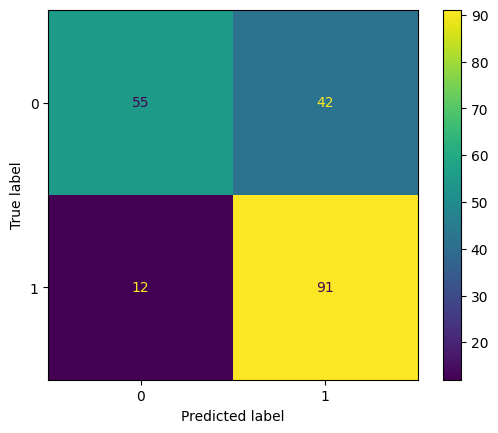

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cf  = confusion_matrix(y_test,y_pred)
print(cf)
accuracy_score(y_test,y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)